# <center> Проект: Анализ резюме из HeadHunter
   

Ссылка на данные:

https://drive.google.com/file/d/1Kb78mAWYKcYlellTGhIjPI-bCcKbGuTn/view

https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@ExchangeRates.zip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Python/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [5]:
df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [7]:
# Информация о числе непустых знаений указана выше. Пропусков мало
# Наибольшее число пропусков в столбце "Опыт работы" (44744-44576=168)

5. Выведите основную статистическую информацию о столбцах.


In [8]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [9]:
# Создание нового признака "Образование"
df['Образование'] = df['Образование и ВУЗ'].str.split().str[:2].apply(' '.join).map({
    'Высшее образование': 'высшее',
    'Неоконченное высшее': 'неоконченное высшее',
    'Среднее специальное': 'среднее специальное',
    'Среднее образование': 'среднее'
})

# Удаление столбца "Образование и ВУЗ"
df = df.drop('Образование и ВУЗ', axis=1)

# Вывод информации о новом признаке для ответа на контрольный вопрос
df['Образование'].value_counts()

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [10]:
# Создание нового признака "Пол"
df['Пол'] = df['Пол, возраст'].str.split(' , ').str[0].map({'Мужчина': 'М', 'Женщина': 'Ж'})

# Создание нового признака "Возраст"
df['Возраст'] = df['Пол, возраст'].str.split(' , ').str[1].str.split().str[0].astype(int)

# Удаление признака "Пол, возраст"
df.drop('Пол, возраст', axis=1, inplace=True)

# Сколько процентов женских резюме представлено в наших данных?
print(df[df['Пол'] == 'Ж']['Пол'].count() / df['Пол'].count() * 100)

# Чему равен средний возраст соискателей?
print(df['Возраст'].mean())

19.070713391739673
32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [11]:
# Сосздадим функцию для извлечения опыта работы
def extract_experience(row):
    if pd.isnull(row) or row == 'Не указано':
        return np.nan

    words = row.split()[:6]  # Вырезаем только первые 6 слов
    years = 0
    months = 0

    # Поиск индексов, где указаны годы и месяцы
    year_indices = [i for i, word in enumerate(words) if word in ['год', 'года', 'лет']]
    month_indices = [i for i, word in enumerate(words) if word in ['месяц', 'месяца', 'месяцев']]

    if year_indices:
        years_index = year_indices[0]
        years = int(words[years_index - 1])

    if month_indices:
        months_index = month_indices[0]
        months = int(words[months_index - 1])

    total_months = years * 12 + months

    return total_months

# Применяем функцию к столбцу "Опыт работы" и создаем новый столбец "Опыт работы (месяц)"
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(extract_experience)

# Удаление столбца "Опыт работы"
df = df.drop('Опыт работы', axis=1)

#Чему равен медианный опыт работы (в месяцах) в нашей таблице?
df['Опыт работы (месяц)'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , …
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [12]:
# Функция для разделения столбца на столбцы "Город", "Готовность к переезду", "Готовность к командировкам"
def extract_city_parts(row):
    parts = row.split(' , ')
    city_part = parts[0].strip()
    relocation_part = np.nan
    business_trip_part = np.nan

    if len(parts) == 4:
        relocation_part = parts[2].strip()
        business_trip_part = parts[3].strip()
    elif len(parts) == 2:
        relocation_part = parts[1].strip()
    elif len(parts) == 3:
        if 'м.' not in parts[1].strip():
            relocation_part = parts[1].strip()
            business_trip_part = parts[2].strip()
        else:
            relocation_part = parts[2].strip()

    return city_part, relocation_part, business_trip_part
# Применяем функцию к столбцу и сохраняем результаты в новые колонки
df[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = df['Город, переезд, командировки'].apply(lambda row: pd.Series(extract_city_parts(row)))
# Удаляем старый столбец
df = df.drop('Город, переезд, командировки', axis=1)

# Функция для преобразования города в необходимые категории
def get_city_category(city_part):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    if city_part in million_cities:
        return 'Город-миллионник'
    elif city_part in ['Москва', 'Санкт-Петербург']:
        return city_part
    else:
        return 'Другие'
# Применяем функцию к столбцу
df['Город'] = df['Город'].apply(get_city_category)

# Функция для определения готовности к переезду
def extract_relocation(relocation_part):
    if pd.isnull(relocation_part):  # Проверка на пропущенное значение
        return False  # Предполагаем, что отсутствие значения означает "не готов"

    if 'не готов' in str(relocation_part):  # Преобразуем значение в строку перед проверкой
        return False
    else:
        return True
# Применяем функцию к столбцу
df['Готовность к переезду'] = df['Готовность к переезду'].apply(extract_relocation)

# Функция для проверки готовности к командировкам
def extract_relocation(business_trip_part):
    if pd.isnull(business_trip_part):  # Проверка на пропущенное значение
        return False  # Предполагаем, что отсутствие значения означает "не готов"

    if 'не готов' in str(business_trip_part):  # Преобразуем значение в строку перед проверкой
        return False
    else:
        return True
# Применяем функцию к столбцу
df['Готовность к командировкам'] = df['Готовность к командировкам'].apply(extract_relocation)

In [13]:
#Сколько процентов соискателей живут в Санкт-Петербурге?
df['Город'].value_counts(normalize=True)

Город
Москва              0.371469
Другие              0.354327
Город-миллионник    0.163866
Санкт-Петербург     0.110339
Name: proportion, dtype: float64

In [14]:
#Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам?

# Вычисляем общее количество соискателей
total_applicants = len(df)

# Вычисляем количество соискателей, готовых к переездам и командировкам
relocation_and_business_trip_ready = df[
    (df['Готовность к переезду'] == True) & (df['Готовность к командировкам'] == True)]
count_relocation_and_business_trip_ready = len(relocation_and_business_trip_ready)

# Вычисляем процент соискателей, готовых к переездам и командировкам
percentage_relocation_and_business_trip_ready = (
    count_relocation_and_business_trip_ready / total_applicants) * 100

# Выводим результат
print(f"Процент соискателей, готовых к переездам и командировкам: {percentage_relocation_and_business_trip_ready}%")

Процент соискателей, готовых к переездам и командировкам: 31.879134632576434%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [15]:
# Разделяем значения в столбце "Занятость" по запятой и создаем новый DataFrame
employment_dummies = df['Занятость'].str.get_dummies(sep=', ').astype(bool)

# Добавляем преобразованные бинарные признаки в исходный DataFrame
df = pd.concat([df, employment_dummies], axis=1)

# Удаляем исходный столбец "Занятость"
df.drop('Занятость', axis=1, inplace=True)

# Разделяем значения в столбце "Занятость" по запятой и создаем новый DataFrame
graphic_dummies = df['График'].str.get_dummies(sep=', ').astype(bool)

# Добавляем преобразованные бинарные признаки в исходный DataFrame
df = pd.concat([df, graphic_dummies], axis=1)

# Удаляем исходный столбец "Занятость"
df.drop('График', axis=1, inplace=True)

# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
project_and_volunteer = df[
    (df['проектная работа'] == True) & (df['волонтерство'] == True)]
print(len(project_and_volunteer))

#Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
work_and_freelance = df[
    (df['вахтовый метод'] == True) & (df['гибкий график'] == True)]
print(len(work_and_freelance))

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата,
* "proportion" - пропорция,
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [16]:
# Считываем данные из CSV файла 'ExchangeRates.csv' в DataFrame exchange_rates
exchange_rates = pd.read_csv('/content/drive/MyDrive/Python/ExchangeRates.csv')

# Преобразуем столбец 'date' в формате даты и приводим даты к формату только даты (без времени)
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], format='%d/%m/%y').dt.date

# Преобразуем столбец 'Обновление резюме' в формате даты и времени в DataFrame df и оставляем только дату
df['date'] = pd.to_datetime(df['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.date

# Задаем словарь currency_mapping
currency_mapping = {
    'грн.': 'UAH',
    'USD': 'USD',
    'EUR': 'EUR',
    'бел.руб.': 'BYN',
    'KGS': 'KGS',
    'сум': 'UZS',
    'AZN': 'AZN',
    'KZT': 'KZT',
    'руб.': 'RUB'
}

# Определяем функцию map_currency
def map_currency(value):
    return currency_mapping.get(value, value)

# Разделяем столбец 'ЗП' на два столбца ('ЗП' и 'currency') по пробелу
df[['ЗП', 'currency']] = df['ЗП'].str.split(' ', expand=True)

# Преобразуем значения в столбце 'ЗП' в целочисленный тип
df['ЗП'] = df['ЗП'].astype(int)

# Применяем функцию map_currency к столбцу 'currency' для замены сокращенных названий валют на полные
df['currency'] = df['currency'].apply(map_currency)

# Объединяем DataFrame df с нужными столбцами из exchange_rates по столбцам 'date' и 'currency' с сохранением всех строк из df
df = df.merge(exchange_rates[['date', 'currency', 'close', 'proportion']], on=['date', 'currency'], how='left')

# Заполняем пропущенные значения в столбце 'close' единицами
df['close'].fillna(1, inplace=True)

# Заполняем пропущенные значения в столбце 'proportion' единицами
df['proportion'].fillna(1, inplace=True)

# Вычисляем значение нового столбца 'ЗП (руб)' как произведение 'ЗП' на 'close' и деление на 'proportion'
df['ЗП (руб)'] = df['ЗП'] * df.close / df.proportion

# Удаляем столбцы 'ЗП', 'date', 'currency', 'close' и 'proportion' из объединенного DataFrame df
df.drop(['ЗП', 'date', 'currency', 'close', 'proportion'], axis=1, inplace=True)

# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
df['ЗП (руб)'].median()

59019.0

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

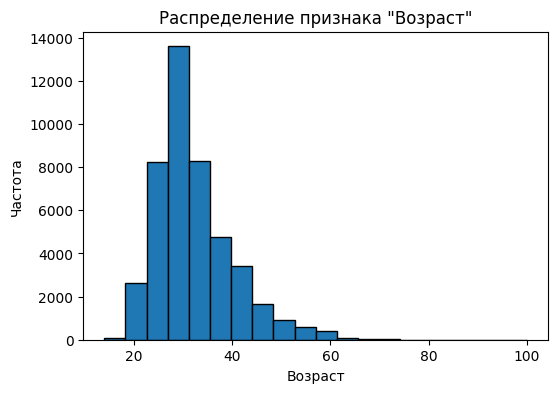

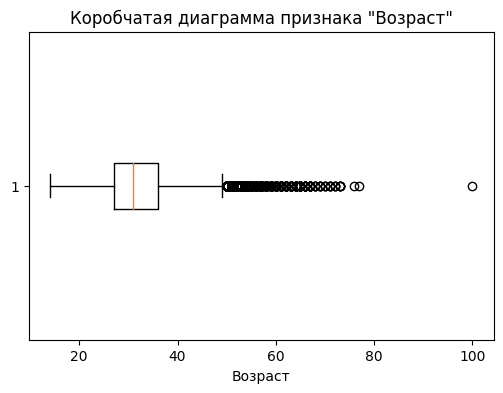


Мода:  0    30
Name: Возраст, dtype: int64
Минимальное значение:  14
Максимальное значение:  100


In [17]:
# Построение гистограммы
plt.figure(figsize=(6, 4))
plt.hist(df['Возраст'], bins=20, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение признака "Возраст"')
plt.show()

# Построение коробчатой диаграммы
plt.figure(figsize=(6, 4))
plt.boxplot(df['Возраст'], vert=False)
plt.xlabel('Возраст')
plt.title('Коробчатая диаграмма признака "Возраст"')
plt.show()

print()
# Мода
print('Мода: ', df['Возраст'].mode())
# Минимальное и максимальное значение
print('Минимальное значение: ', df['Возраст'].min())
print('Максимальное значение: ', df['Возраст'].max())

1) Мода равна 30 годам.

2) Минимальные и максимальные значения равны 14 и 100.

3) Большинство значений в выборке входят в интервал от 20 до 50.

4) Выбросом является значение возраста 100 и несколько значений около 80.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

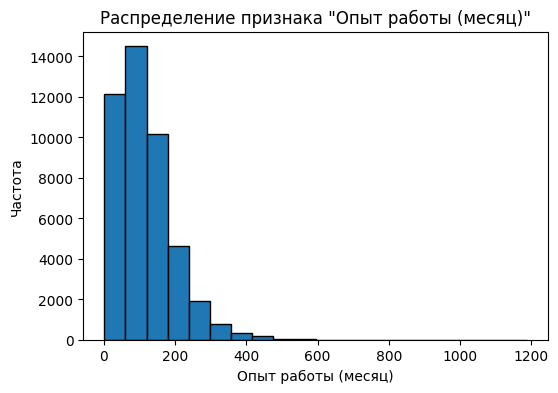

Мода:  0    81.0
Name: Опыт работы (месяц), dtype: float64
Минимальное значение:  1.0
Максимальное значение:  1188.0


In [18]:
# Построение гистограммы
plt.figure(figsize=(6, 4))
plt.hist(df['Опыт работы (месяц)'], bins=20, edgecolor='black')
plt.xlabel('Опыт работы (месяц)')
plt.ylabel('Частота')
plt.title('Распределение признака "Опыт работы (месяц)"')
plt.show()

# Мода
print('Мода: ', df['Опыт работы (месяц)'].mode())
# Минимальное и максимальное значение
print('Минимальное значение: ', df['Опыт работы (месяц)'].min())
print('Максимальное значение: ', df['Опыт работы (месяц)'].max())

In [19]:
df['Опыт работы (месяц)'].value_counts().sort_index()

Опыт работы (месяц)
1.0        21
2.0        73
3.0       111
4.0       135
5.0       141
         ... 
586.0       1
622.0       1
653.0       1
663.0       1
1188.0      1
Name: count, Length: 517, dtype: int64

1) Мода равна 81 месяцу.

2) Минимальные и максимальные значения равны 1 и 1188.

3) Большинство значений в выборке входят в интервал от 0 до 200.

4) Выбросом является значение возраста 1188 - это 99 лет.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


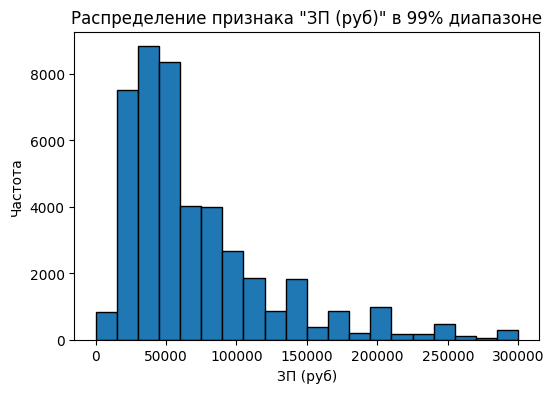

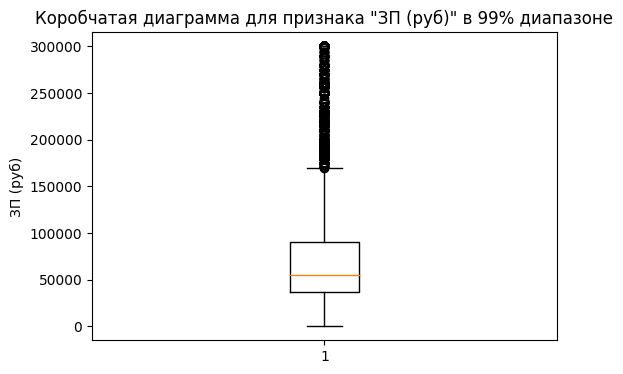

Минимальное значение:  1.0
Максимальное значение:  24304876.0
Значения в диапазоне 0.05-0.95:  20000.0 - 200000.0
Сколько соискателей требуют заработную плату выше 1 миллиона рублей?:  5


In [20]:
# Построение гистограммы в 99% диапазоне для признака 'ЗП (руб)'
plt.figure(figsize=(6, 4))
plt.hist(df['ЗП (руб)'].loc[df['ЗП (руб)'] <= df['ЗП (руб)'].quantile(0.99)], bins=20, edgecolor='black')
plt.xlabel('ЗП (руб)')
plt.ylabel('Частота')
plt.title('Распределение признака "ЗП (руб)" в 99% диапазоне')
plt.show()

# Построение коробчатой диаграммы для признака 'ЗП (руб)' в 99% диапазоне
plt.figure(figsize=(6, 4))
plt.boxplot(df['ЗП (руб)'].loc[df['ЗП (руб)'] <= df['ЗП (руб)'].quantile(0.99)])
plt.ylabel('ЗП (руб)')
plt.title('Коробчатая диаграмма для признака "ЗП (руб)" в 99% диапазоне')
plt.show()

# Минимальное и максимальное значение
print('Минимальное значение: ', df['ЗП (руб)'].min())
print('Максимальное значение: ', df['ЗП (руб)'].max())
# Значения в диапазоне 0.05-0.95
print('Значения в диапазоне 0.05-0.95: ', df['ЗП (руб)'].quantile(0.05), '-', df['ЗП (руб)'].quantile(0.95))
# Cколько соискателей требуют заработную плату выше 1 миллиона рублей?
print('Сколько соискателей требуют заработную плату выше 1 миллиона рублей?: ', df['ЗП (руб)'].loc[df['ЗП (руб)'] > 1e6].count())

1) Минимальные и максимальные значения равны 1 и 24304876.

2) Большинство значений в выборке входят в интервал от 20 000 до 200 000.

3) Выбросами можно считать значения меньше 10 000 и больше 300 000.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

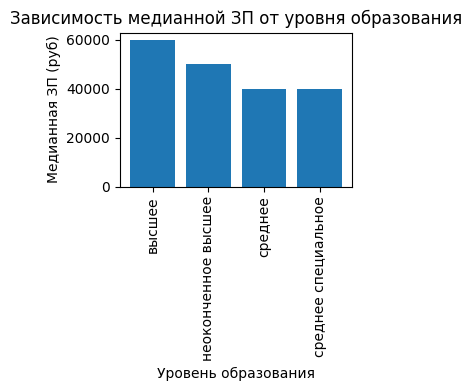

In [21]:
# Фильтрация данных по желаемой заработной плате (< 1 млн рублей)
filtered_df = df[df['ЗП (руб)'] < 1000000]

# Группировка данных по уровню образования и вычисление медианной заработной платы
median_salary = filtered_df.groupby('Образование')['ЗП (руб)'].median()

# Создание столбчатой диаграммы
plt.figure(figsize=(3, 2))
plt.bar(median_salary.index, median_salary.values)
plt.xlabel('Уровень образования')
plt.ylabel('Медианная ЗП (руб)')
plt.title('Зависимость медианной ЗП от уровня образования')
plt.xticks(rotation=90)
plt.show()

1) Наибольшая медианная зарплата наблюдается у лиц с высшим образованием, а наименьшая — у лиц со средним специальным образованием.

2) Очевидно, что чем выше уровень образования, тем выше зарплата.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

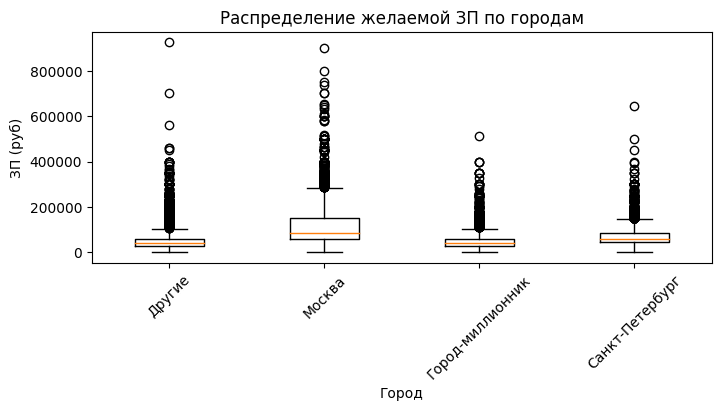

Город: Другие
Медиана: 40000.00
Размах: 923982.00
Отношение размаха к медиане: 23.10

Город: Москва
Медиана: 85000.00
Размах: 899999.00
Отношение размаха к медиане: 10.59

Город: Город-миллионник
Медиана: 40000.00
Размах: 511680.60
Отношение размаха к медиане: 12.79

Город: Санкт-Петербург
Медиана: 60000.00
Размах: 645170.00
Отношение размаха к медиане: 10.75



In [22]:
# Фильтрация данных по желаемой заработной плате (< 1 млн рублей)
filtered_df = df[df['ЗП (руб)'] < 1000000]

# Создание списка для хранения медиан и размаха
medians = []
ranges = []

# Вычисление медианы и размаха для каждого города
for city in filtered_df['Город'].unique():
    city_data = filtered_df[filtered_df['Город'] == city]['ЗП (руб)']
    medians.append(np.median(city_data))
    ranges.append(np.ptp(city_data))

# Построение ящика с усами с выводом информации о медиане и размахе
plt.figure(figsize=(8, 3))
boxplot = plt.boxplot([filtered_df[filtered_df['Город'] == city][
    'ЗП (руб)'] for city in filtered_df['Город'].unique()], labels=filtered_df['Город'].unique())
plt.xlabel('Город')
plt.ylabel('ЗП (руб)')
plt.title('Распределение желаемой ЗП по городам')
plt.xticks(rotation=45)
plt.show()

# Печать медиан и размаха для каждого города, отношения размаха к медиане
for i, city in enumerate(filtered_df['Город'].unique()):
    print(f'Город: {city}')
    print(f'Медиана: {medians[i]:.2f}')
    print(f'Размах: {ranges[i]:.2f}')
    print(f'Отношение размаха к медиане: {ranges[i] / medians[i]:.2f}')
    print()

1) Признак города важен. Медианная зарплата выше в Москве, чуть ниже в Санкт-Петербурге и еще ниже в других городах.

2) Отношения размаха к медиане примерно одинаковые, за исключением категории "Другие".

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

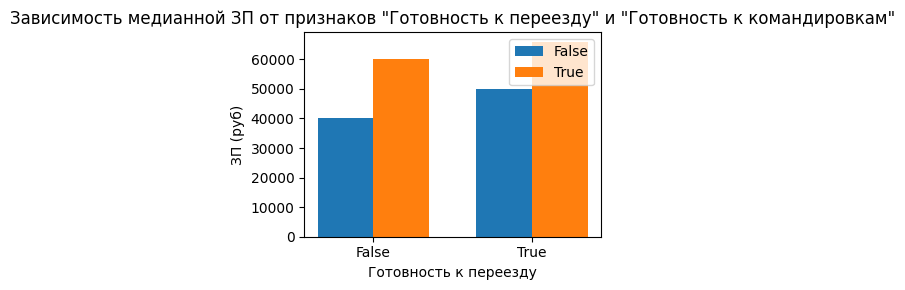

Медианная заработная плата (руб):
Готовность к командировкам    False      True 
Готовность к переезду                         
False                       40000.0  60000.000
True                        50000.0  65849.455


In [23]:
# Группировка данных по признакам "Готовность к переезду" и "Готовность к командировкам" и вычисление медианы
grouped_df = df.groupby(["Готовность к переезду", "Готовность к командировкам"])["ЗП (руб)"].median().unstack()

# Создание списка категорий и позиций для столбцов
categories = grouped_df.index
positions = np.arange(len(categories))

# Построение столбчатой диаграммы
plt.figure(figsize=(4, 3))
width = 0.35

for i, col in enumerate(grouped_df.columns):
    plt.bar(positions + i * width, grouped_df[col], width, label=col)

plt.xlabel('Готовность к переезду')
plt.ylabel('ЗП (руб)')
plt.title('Зависимость медианной ЗП от признаков "Готовность к переезду" и "Готовность к командировкам"')
plt.xticks(positions + width / 2, categories)
plt.legend()
plt.tight_layout()
plt.show()

# Напечатать медианную заработную плату для каждой категории
print("Медианная заработная плата (руб):")
print(grouped_df)

У кандидатов, готовых к переезду и командировкам, наиболее высокая зарплата, а у не готовых и к тому, и к другому - наиболее низкая.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

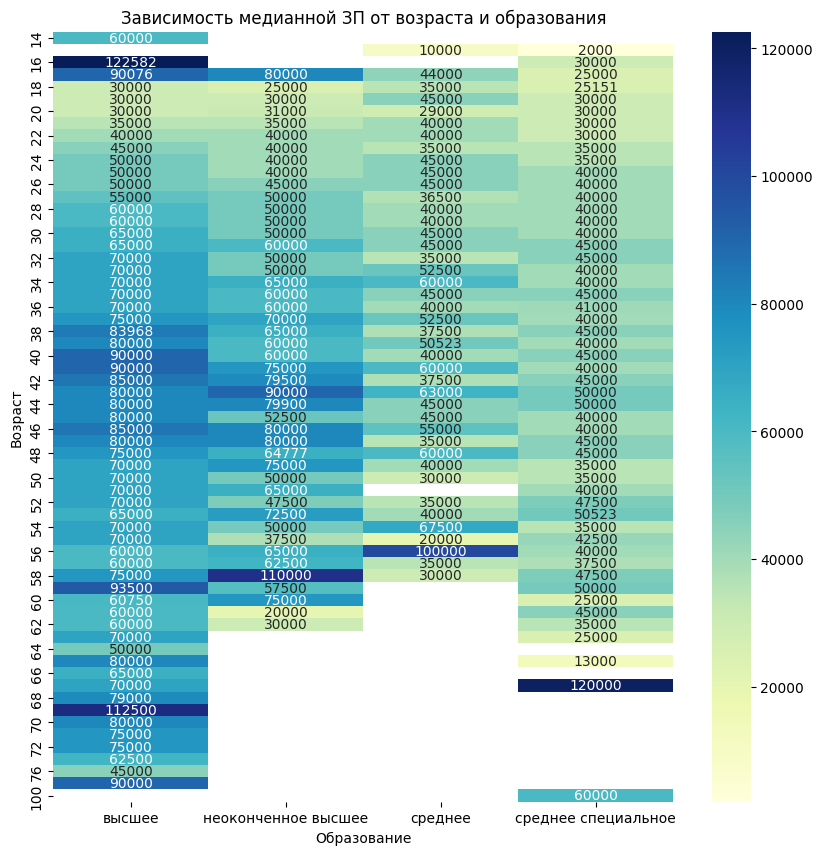

In [24]:
# Создание сводной таблицы с медианной заработной платой
pivot_table = pd.pivot_table(df, values='ЗП (руб)', index='Возраст', columns='Образование', aggfunc=np.median)

# Построение тепловой карты
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')

plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.title('Зависимость медианной ЗП от возраста и образования')
plt.show()

Для лиц с более высоким уровнем образования характерен более высокий прирост заработной платы.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

Количество точек, лежащих выше прямой: 7


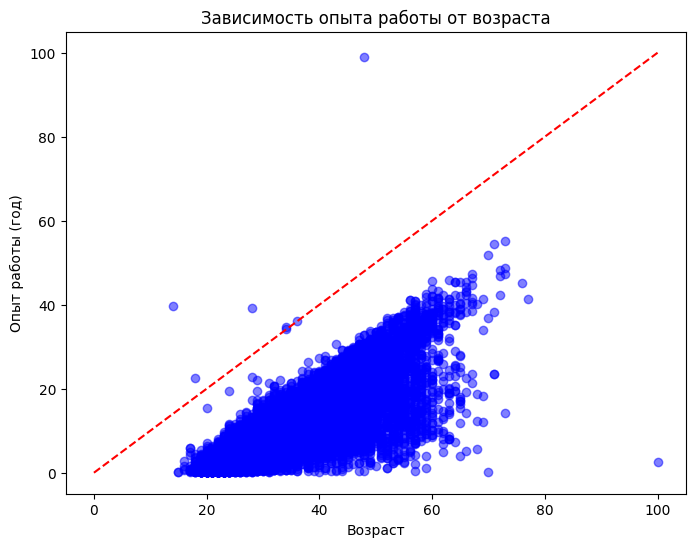

In [33]:
# Копия датафрейма
df3 = df.copy()

# Перевод опыта работы из месяцев в годы
df3['Опыт работы (год)'] = df3['Опыт работы (месяц)'] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(df3['Возраст'], df3['Опыт работы (год)'], color='b', alpha=0.5)

# Построение прямой (0, 0) - (100, 100)
plt.plot([0, 100], [0, 100], color='r', linestyle='--')

# Подписи осей и заголовок
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (год)')
plt.title('Зависимость опыта работы от возраста')

# Определение точек, лежащих выше прямой
points_above_line = df3[(df3['Опыт работы (год)'] > df3['Возраст'])]
num_points_above_line = len(points_above_line)

# Вывод количества точек, лежащих выше прямой
print("Количество точек, лежащих выше прямой:", num_points_above_line)

plt.show()

В данных есть 7 выбросов, когда опыт работы больше возраста

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


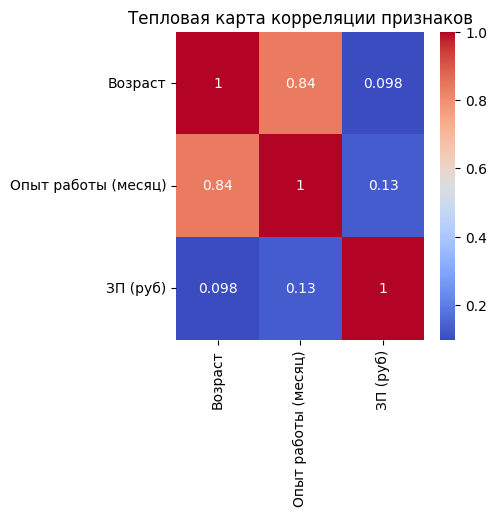

In [26]:
# Выберем только числовые признаки из набора данных
numeric_features = df.select_dtypes(include=[np.number])

# Вычислим матрицу корреляции
corr_matrix = numeric_features.corr()

# Построим тепловую карту корреляции
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции признаков')
plt.show()

Опыт работы сильно связан с возрастом кандидата (что и ожидалось). При этом размер заработной платы имеет весьма слабую связь как с возрастом, так и с опытом работы. Видимо, другие факторы имеют на нее куда большее влияние.

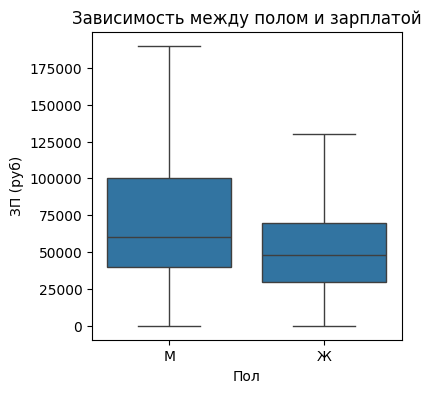

Количество мужчин: 36211
Количество женщин: 8533
Медианный уровень зарплаты мужчин: 60000.0
Медианный уровень зарплаты женщин: 48000.0


In [43]:
# Оценим взаимосвязь между полом и зарплатой (в пределах 99 квантилей)
plt.figure(figsize=(4, 4))
sns.boxplot(x='Пол', y='ЗП (руб)', data=df, showfliers=False)
plt.title('Зависимость между полом и зарплатой')
plt.show()

# Укажем число лиц каждого пола
print('Количество мужчин:', df[df['Пол']=='М']['ЗП (руб)'].count())
print('Количество женщин:', df[df['Пол']=='Ж']['ЗП (руб)'].count())

# Укажем медианный уровень и размах для каждого пола (в пределах 99 квантилей)
print('Медианный уровень зарплаты мужчин:', df[df['Пол']=='М']['ЗП (руб)'].median())
print('Медианный уровень зарплаты женщин:', df[df['Пол']=='Ж']['ЗП (руб)'].median())

Число мужчин куда больше, чем женщин. Медианный уровень зарплаты и размах зарплаты у мужчин больше, чем женщин.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [44]:
# Найти полные дубликаты
duplicates = df3.duplicated()

# Подсчитать количество полных дубликатов
num_duplicates = duplicates.sum()

# Удалить полные дубликаты
df3 = df3.drop_duplicates()

# Вывести количество удаленных дубликатов
print("Количество полных дубликатов, найденных и удаленных:", num_duplicates)

Количество полных дубликатов, найденных и удаленных: 158


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [45]:
# Вывести информацию о числе пропусков в столбцах
missing_values = df3.isnull().sum()

print("Число пропусков в каждом столбце:")
print(missing_values)

Число пропусков в каждом столбце:
Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
волонтерство                         0
полная занятость                     0
проектная работа                     0
стажировка                           0
частичная занятость                  0
вахтовый метод                       0
гибкий график                        0
полный день                          0
сменный график                       0
удаленная работа                     0
ЗП (руб)                             0
Опыт работы (год)                  168
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [46]:
# Удалить строки с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
df3 = df3.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Заполнить пропуски в столбце "Опыт работы (месяц)" медианным значением
median_experience = df3['Опыт работы (месяц)'].median()
df3['Опыт работы (месяц)'] = df3['Опыт работы (месяц)'].fillna(median_experience)

# Чему равно среднее значение в столбце «Опыт работы (месяц)»?
mean_experience = df3['Опыт работы (месяц)'].mean()
print("Среднее значение в столбце «Опыт работы (месяц)»:", mean_experience)

Среднее значение в столбце «Опыт работы (месяц)»: 114.35831239906693


<ipython-input-46-b0fbbe27da71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Опыт работы (месяц)'] = df3['Опыт работы (месяц)'].fillna(median_experience)


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [47]:
# Сохранить изначальное количество строк в таблице
original_len = len(df3)

# Удалить резюме с заработной платой выше 1 миллиона рублей или ниже 1 тысячи рублей
df3 = df3[(df['ЗП (руб)'] <= 1000000) & (df3['ЗП (руб)'] >= 1000)]

# Подсчитать количество выбросов
outliers_count = original_len - len(df3)

# Вывести количество выбросов
print("Количество выбросов:", outliers_count)

Количество выбросов: 89


<ipython-input-47-435a6cbe6a92>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df3[(df['ЗП (руб)'] <= 1000000) & (df3['ЗП (руб)'] >= 1000)]


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [48]:
# Создать фильтр для поиска резюме, в которых опыт работы в месяцах превышает возраст в годах
outliers = df3[df3['Опыт работы (месяц)'] / 12 > df3['Возраст']]

# Подсчитать количество выбросов
outliers_count = len(outliers)

# Удалить выбросы из данных
df3 = df3.drop(outliers.index)

# Вывести количество выбросов
print("Количество выбросов:", outliers_count)

Количество выбросов: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

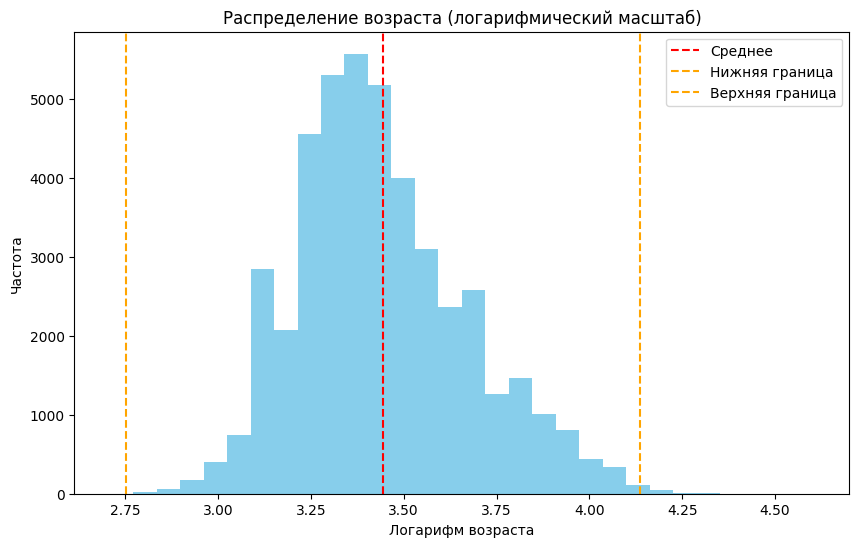

Распределение ассиметрично вправо


In [49]:
# Построение распределения признака "Возраст" в логарифмическом масштабе
plt.figure(figsize=(10, 6))
plt.hist(np.log(df3['Возраст']), bins=30, color='skyblue')
plt.title("Распределение возраста (логарифмический масштаб)")
plt.xlabel("Логарифм возраста")
plt.ylabel("Частота")

# Определение среднего и границ интервала метода трех сигм
mean = np.log(df3['Возраст']).mean()
std = np.log(df3['Возраст']).std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Добавление линий среднего и границ интервала метода трех сигм
plt.axvline(mean, color='red', linestyle='--', label='Среднее')
plt.axvline(lower_bound, color='orange', linestyle='--', label='Нижняя граница')
plt.axvline(upper_bound, color='orange', linestyle='--', label='Верхняя граница')
plt.legend()
plt.show()
print('Распределение ассиметрично вправо')

In [50]:
# Вычисление z-отклонения для определения выбросов
z_scores = (np.log(df3['Возраст']) - mean) / std
outliers = df3[(z_scores > 4) | (z_scores < -3)]

# Удаление выбросов из данных
df3 = df3.drop(outliers.index)

# Вывод таблицы с выбросами
outliers['Возраст']

31137     15
32950     15
33654    100
Name: Возраст, dtype: int64

У выбросов значения возраста равны 15 и 100